# 機器學習 - 監督學習

Lasso和Ridge回歸：以減少模型的複雜性和防止overfitting

## 正則化

防止overfitting，提高泛化能力的技巧

[深度學習基礎--正則化與norm--正則化(Regularization)](https://www.itread01.com/content/1542681136.html)

[機器學習中的正則化項（L1, L2）的理解](https://codertw.com/%E7%A8%8B%E5%BC%8F%E8%AA%9E%E8%A8%80/615856/)

---

## Ridge Regression

最大優點：
 > Ridge Regression是為了降低複雜度
 
 1. 解決**共線性**問題：data有雜訊
 2. 解決**overfitting**：模型太複雜(不完全是
    > overfitting通常想到Ridge，將α調大

In [3]:
#laoding dataset
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

X, y = load_diabetes().data, load_diabetes().target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=8)

- 線性機器學習模型：input特徵的線性函數，預測output的最簡單方法之一

Ridge Regression vs. Linear Regression

迴歸線係數變得較小 → 模型變簡單  

((複雜度越低的模型在訓練集上的表現越差，但泛化的能力會更好

- 泛化能力：一般化的意思(普遍會有這種情況)，由train_data中得知特性/特徵的表現，在其他data進來的時候，大概也會表現這樣
> 希望 train & test的數值不要相差太多

In [3]:
#Loading Ridge Regression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


ridge = Ridge(alpha=1).fit(X_train, y_train) #alpha=1.0
    #Ridge唯一要設參數：alpha(控制正則項強度)，為浮點數
print(ridge.coef_) #十個變數的相關係數

y_train_pred = ridge.predict(X_train)
y_test_pred = ridge.predict(X_test)

print('MSE_train: %.3f, MSE_test: %.3f' % (mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)))
print('R^2_train: %.3f, R^2_test: %.3f' % (r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)))

[  36.8262072   -75.80823733  282.42652716  207.39314972   -1.46580263
  -27.81750835 -134.3740951    98.97724793  222.67543268  117.97255343]
MSE_train: 3397.720, MSE_test: 3262.233
R^2_train: 0.433, R^2_test: 0.433


比較不同alpha

In [7]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


ridge = Ridge(alpha=1).fit(X_train, y_train) #alpha=1.0
print(ridge.coef_)

y_train_pred = ridge.predict(X_train)
y_test_pred = ridge.predict(X_test)

print('MSE_train: %.3f, MSE_test: %.3f' % (mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)))
print('R^2_train: %.3f, R^2_test: %.3f' % (r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)))

[  36.8262072   -75.80823733  282.42652716  207.39314972   -1.46580263
  -27.81750835 -134.3740951    98.97724793  222.67543268  117.97255343]
MSE_train: 3397.720, MSE_test: 3262.233
R^2_train: 0.433, R^2_test: 0.433


增加α：迴歸係數會**變小**(但不會變0)，模型R^2減少，但是泛化能力提高

In [8]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


ridge = Ridge(alpha=10).fit(X_train, y_train) #alpha=10.0
print(ridge.coef_)

y_train_pred = ridge.predict(X_train)
y_test_pred = ridge.predict(X_test)

print('MSE_train: %.3f, MSE_test: %.3f' % (mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)))
print('R^2_train: %.3f, R^2_test: %.3f' % (r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)))

[ 15.08676646  -1.9586191   60.69903425  47.11843221  14.72337546
   9.87779644 -35.56015266  35.74603575  54.27193163  37.42095846]
MSE_train: 5083.146, MSE_test: 4817.252
R^2_train: 0.151, R^2_test: 0.162


In [4]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


ridge = Ridge(alpha=100).fit(X_train, y_train) #alpha=100.0
print(ridge.coef_)

y_train_pred = ridge.predict(X_train)
y_test_pred = ridge.predict(X_test)

print('MSE_train: %.3f, MSE_test: %.3f' % (mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)))
print('R^2_train: %.3f, R^2_test: %.3f' % (r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)))

[ 1.97274916  0.18165542  7.07146414  5.57037191  2.23127828  1.71614972
 -4.34680496  4.64889014  6.54405454  4.68662849]
MSE_train: 5867.327, MSE_test: 5629.617
R^2_train: 0.020, R^2_test: 0.021


α愈小會愈接近Linear Regression

In [9]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


ridge = Ridge(alpha=0.1).fit(X_train, y_train) #alpha=0.1
print(ridge.coef_)

y_train_pred = ridge.predict(X_train)
y_test_pred = ridge.predict(X_test)

print('MSE_train: %.3f, MSE_test: %.3f' % (mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)))
print('R^2_train: %.3f, R^2_test: %.3f' % (r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)))

[  24.77802114 -228.33364296  495.54594378  361.21481169 -109.82542594
  -78.3286822  -190.69780344  108.24040795  383.72269392  107.42593373]
MSE_train: 2865.170, MSE_test: 3027.227
R^2_train: 0.522, R^2_test: 0.473


## Lasso Regression

In [6]:
#Loading Lasso Regression
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=1).fit(X_train, y_train) #alpha=1
    #僅需要調alpha(比重)
print(lasso.coef_)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print('MSE_train: %.3f, MSE_test: %.3f' % (mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)))
print('R^2_train: %.3f, R^2_test: %.3f' % (r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)))

[  0.          -0.         384.73421807  72.69325545   0.
   0.          -0.           0.         247.88881314   0.        ]
MSE_train: 3818.201, MSE_test: 3646.836
R^2_train: 0.362, R^2_test: 0.366


比較不同alpha

In [6]:
#Loading Lasso Regression
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=1).fit(X_train, y_train) #alpha=1
    #僅需要調alpha(比重)
print(lasso.coef_)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print('MSE_train: %.3f, MSE_test: %.3f' % (mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)))
print('R^2_train: %.3f, R^2_test: %.3f' % (r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)))

[  0.          -0.         384.73421807  72.69325545   0.
   0.          -0.           0.         247.88881314   0.        ]
MSE_train: 3818.201, MSE_test: 3646.836
R^2_train: 0.362, R^2_test: 0.366


R^2很差，原本overfitting的問題變成underfitting

In [7]:
#Loading Lasso Regression
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1).fit(X_train, y_train) #alpha=0.1
    #僅需要調alpha(比重)
print(lasso.coef_)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print('MSE_train: %.3f, MSE_test: %.3f' % (mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)))
print('R^2_train: %.3f, R^2_test: %.3f' % (r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)))

[   0.         -181.40911617  537.71961152  355.19720303 -105.43471481
   -0.         -198.99829878    0.          440.25133426   48.25573121]
MSE_train: 2877.650, MSE_test: 2989.599
R^2_train: 0.519, R^2_test: 0.480


In [8]:
#Loading Lasso Regression
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.001).fit(X_train, y_train) #alpha=0.001
    #僅需要調alpha(比重)
print(lasso.coef_)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print('MSE_train: %.3f, MSE_test: %.3f' % (mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)))
print('R^2_train: %.3f, R^2_test: %.3f' % (r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)))

[  11.82931254 -281.06324599  534.59556593  401.25597128 -971.04936503
  579.28119134  151.83257187  191.85084436  736.83680063   91.17487055]
MSE_train: 2812.574, MSE_test: 3102.099
R^2_train: 0.530, R^2_test: 0.460


當alpha變小，迴歸線係數會變大，模型複雜度也會變大

## Elastic Net

結合Ridge跟Lasso

In [9]:
#loading Elastic Net
from sklearn.linear_model import ElasticNet

elanet = ElasticNet(alpha=1, l1_ratio=0.5).fit(X_train, y_train)
    #要調的參數有兩個：
    #  alpha：乘以懲罰項的常數，預設為1
    #       →若alpha=0，相當於LinearRegression，不建議使用
    #  l1_ratio：混合參數，若要同時使用Ridge&Lasso，請看作業四_answer如何調整
    #     在alpha為1的情況下
    #     L1_ratio = 1:Lasso (l1_norm)
    #     L1_ratio = 0:Ridge (l2_norm)
print(elanet.coef_)

y_train_pred = elanet.predict(X_train)
y_test_pred = elanet.predict(X_test)

print('MSE_train: %.3f, MSE_test: %.3f' % (mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)))
print('R^2_train: %.3f, R^2_test: %.3f' % (r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)))

[ 0.21886047  0.          3.32172605  2.40903271  0.39329589  0.0813468
 -1.66664402  1.86756919  3.0113635   1.88112395]
MSE_train: 5937.607, MSE_test: 5704.626
R^2_train: 0.009, R^2_test: 0.008


##   Logistic Regression

一種監督式學習，處理二元分類的問題

___

### Sigmoid function 

將線性迴歸模型的output轉換為機率

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import math

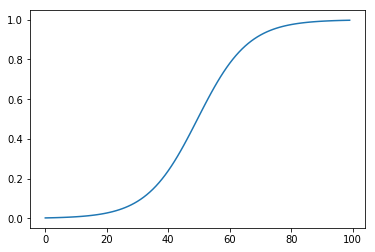

In [22]:
#畫Sigmoid function線性圖
y = [1 / (1+math.exp(-x)) for x in np.linspace(-6, 6, 100)]

plt.plot(y)

___

In [3]:
#loading iris dataset
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [4]:
iris.target   #類別只有0、1、2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [5]:
feature = pd.DataFrame(iris['data'], columns = iris['feature_names'])
target = pd.DataFrame(iris['target'], columns = ['class'])

data = pd.concat([feature, target], axis=1) #axis=1：橫向合併

#二元分：區分2跟不是2的
df = data[data['class'] != 2] #放入不是class=2的兩個類別

In [10]:
df.shape  #查看(列, 行)

(100, 5)

In [11]:
df.tail(10) #不含class=2

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
90,5.5,2.6,4.4,1.2,1
91,6.1,3.0,4.6,1.4,1
92,5.8,2.6,4.0,1.2,1
93,5.0,2.3,3.3,1.0,1
94,5.6,2.7,4.2,1.3,1
95,5.7,3.0,4.2,1.2,1
96,5.7,2.9,4.2,1.3,1
97,6.2,2.9,4.3,1.3,1
98,5.1,2.5,3.0,1.1,1
99,5.7,2.8,4.1,1.3,1


In [12]:
data.tail(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
140,6.7,3.1,5.6,2.4,2
141,6.9,3.1,5.1,2.3,2
142,5.8,2.7,5.1,1.9,2
143,6.8,3.2,5.9,2.3,2
144,6.7,3.3,5.7,2.5,2
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


C:\Users\vanik\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


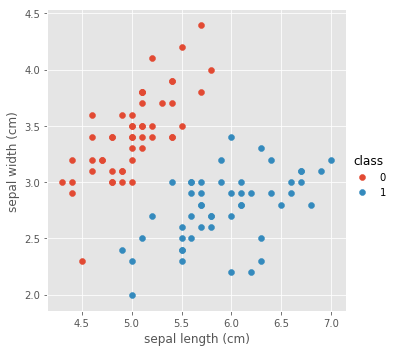

In [7]:
#畫出散點圖，看資料型態，是否可用一條線區分
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot') #make plots look better
g = sns.FacetGrid(df, hue='class', size=5) #初始化網格，設置畫板和軸，但不會繪製任何東西
    # input：DataFrame
    # FacetGrid：可繪製最多三個變數(row、col、hue)
    #   row、col：與'軸'有明顯對應關係
    #   hue：根據class，使用不同顏色
g.map(plt.scatter, "sepal length (cm)", "sepal width (cm)") #在網格上繪製數據
    # plt.scatter、plt.hist、sns.regplot、sns.barplot、sns.boxplot
g.add_legend()  #圖例

[Seaborn學習（一）------- 構建結構化多繪圖網格（FacetGrid(）、map()）詳解](https://blog.csdn.net/weixin_42398658/article/details/82960379)

[18-12-11-視覺化庫Seaborn學習筆記（六：FacetGrid）
](https://www.itread01.com/content/1545030424.html)

In [8]:
#標準化：增加收斂速度、避免偏向某個變數去做訓練
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.iloc[:, :2].values #取前兩個feature
y = df.iloc[:, 4].values
    #擷取dataframe內的資料

sc = StandardScaler()
sc.fit(X)
X_std = sc.transform(X)

In [9]:
#訓練 logistic regression 模型 
from sklearn.linear_model import LogisticRegression
from matplotlib.colors import ListedColormap #創造or操作顏色映射

lr = LogisticRegression(C=100.0, random_state=1)
    #參數C：必為浮點數，Ridge後面的模型複雜度(平方)的倒數
    #      正則強度的倒數，值愈小正則強度就愈強
lr.fit(X_std, y)

#得出線(決策邊界)
print(lr.coef_)
print(lr.intercept_)

[[ 9.87113623 -6.67376595]]
[1.7401565]


C:\Users\vanik\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[machine learning 下的 Logistic Regression 實作(使用python)](https://medium.com/@jacky308082/machine-learning-%E4%B8%8B%E7%9A%84-logistic-regression-%E5%AF%A6%E4%BD%9C-%E4%BD%BF%E7%94%A8python-d19b971ff9dc)

In [10]:
# 定義決策區域 (decision region)
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02): 
        #classifier：迴歸模型
        #resolution：解析度(間隔)
    
    #setup marker generator and color map設置標記生成器 & 顏色圖
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))]) #找出y(目標變數)種類，用color內顏色區分(最多5類)
        # np.unique(input, return_index=True, return_inverse=True)：去除重複的元素，並按元素順序由小到大排列，返回一個新的無重tuple or list
        #    return_index=True：返回new_list元素在old_list中的位置，並以list形式另外儲存(要多給一個空間，長度等於new_list)
        #    return_inverse=True：返回old_list元素在new_list中的位置，並以list形式另外儲存(要多給一個空間，長度等於old_list)
        # colors[:x]：從index=0到index=x-1(總共會出現x個元素)
    
    
    #plot the decision surface繪製決策面
        # Logistic Regression在此僅作二元分類，X只會有兩欄(column)
    x1_min, x1_max = X[:, 0].min()-1, X[:, 0].max()+1  #找出第一欄的範圍(min-1, Max+1)
    x2_min, x2_max = X[:, 1].min()-1, X[:, 1].max()+1  #找出第二欄的範圍(min-1, Max+1)
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution)) #用X變數找出x軸、y軸
        # np.arange(start, end, step)：建立一個range內的list
        # np.meshgrid(x, y)：用兩個座標軸上的點在平面上畫網格
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T) #使用給定的套件模型去預測(決策邊線)
        # .ravel()：降為1維
        # np.array：建立一個array，合併xx1、xx2資料
        # .T：轉置
    Z = Z.reshape(xx1.shape) #改變矩陣形狀
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap) #繪製輪廓線且填充輪廓
        # xx1：X軸數據
        # xx2：Y軸數據
        # Z：指定X、Y座標對應點的高度數據
        # alpha：透明度
        # cmap：指定等高線的顏色映射(自動用不同的顏色來區分不同的高度區域)
    plt.xlim(xx1.min(), xx1.max()) #x軸限制
    plt.ylim(xx2.min(), xx2.max()) #y軸限制
    
    #畫出資料點(y：實際點)
    for idx, cl in enumerate(np.unique(y)):
            # enumerate()：組合一個索引序列，可同時獲得 索引&值
            plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=colors[idx], marker=markers[idx], label=cl, edgecolor='black')
                # x：特徵變數第一欄
                # y：特徵變數第二欄
                # edgecolor：標記的邊緣顏色
        
    #highlight test samples
    if test_idx:
        #plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]
        
        plt.scatter(X_test[:, 0], X_test[:, 1], c='', edgecolor='black', alpha=1.0, linewidth=1, marker='o', s=100, label='test set')

[Python中numpy庫unique函數解析](https://blog.csdn.net/yangyuwen_yang/article/details/79193770)

[Numpy中Meshgrid函數介紹及2種應用場景](https://www.cnblogs.com/lemonbit/p/7593898.html#4184208)

[Python Matplotlib contour和contourf：繪製等高線](http://c.biancheng.net/view/2719.html)

[matplotlib.pyplot contourf()函式的使用](https://www.itread01.com/content/1542579970.html)

---

測試

In [38]:
colors[:3]

('red', 'blue', 'lightgreen')

In [ ]:
X

In [50]:
x1_min, x1_max = X[:, 0].min()-1, X[:, 0].max()+1 
print(x1_min, x1_max)

3.3 8.0


In [56]:
np.arange(x1_min, x1_max)

array([3.3, 4.3, 5.3, 6.3, 7.3])

In [60]:
# xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02), np.arange(x2_min, x2_max, 0.02))
np.arange(x1_min, x1_max, 0.02)

array([3.3 , 3.32, 3.34, 3.36, 3.38, 3.4 , 3.42, 3.44, 3.46, 3.48, 3.5 ,
       3.52, 3.54, 3.56, 3.58, 3.6 , 3.62, 3.64, 3.66, 3.68, 3.7 , 3.72,
       3.74, 3.76, 3.78, 3.8 , 3.82, 3.84, 3.86, 3.88, 3.9 , 3.92, 3.94,
       3.96, 3.98, 4.  , 4.02, 4.04, 4.06, 4.08, 4.1 , 4.12, 4.14, 4.16,
       4.18, 4.2 , 4.22, 4.24, 4.26, 4.28, 4.3 , 4.32, 4.34, 4.36, 4.38,
       4.4 , 4.42, 4.44, 4.46, 4.48, 4.5 , 4.52, 4.54, 4.56, 4.58, 4.6 ,
       4.62, 4.64, 4.66, 4.68, 4.7 , 4.72, 4.74, 4.76, 4.78, 4.8 , 4.82,
       4.84, 4.86, 4.88, 4.9 , 4.92, 4.94, 4.96, 4.98, 5.  , 5.02, 5.04,
       5.06, 5.08, 5.1 , 5.12, 5.14, 5.16, 5.18, 5.2 , 5.22, 5.24, 5.26,
       5.28, 5.3 , 5.32, 5.34, 5.36, 5.38, 5.4 , 5.42, 5.44, 5.46, 5.48,
       5.5 , 5.52, 5.54, 5.56, 5.58, 5.6 , 5.62, 5.64, 5.66, 5.68, 5.7 ,
       5.72, 5.74, 5.76, 5.78, 5.8 , 5.82, 5.84, 5.86, 5.88, 5.9 , 5.92,
       5.94, 5.96, 5.98, 6.  , 6.02, 6.04, 6.06, 6.08, 6.1 , 6.12, 6.14,
       6.16, 6.18, 6.2 , 6.22, 6.24, 6.26, 6.28, 6.

In [61]:
x2_min, x2_max = X[:, 1].min()-1, X[:, 1].max()+1

In [67]:
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02), np.arange(x2_min, x2_max, 0.02))
print(xx1.shape)
print(xx2.shape)

(220, 235)
(220, 235)


In [71]:
xx1.ravel()

array([3.3 , 3.32, 3.34, ..., 7.94, 7.96, 7.98])

In [77]:
np.array([1, 7])

array([1, 7])

In [79]:
np.array([xx1.ravel(), xx2.ravel()]).T

array([[3.3 , 1.  ],
       [3.32, 1.  ],
       [3.34, 1.  ],
       ...,
       [7.94, 5.38],
       [7.96, 5.38],
       [7.98, 5.38]])

In [98]:
np.unique(y)

array([0, 1])

In [99]:
for idx, cl in enumerate(np.unique(y)):
    print(idx, cl)

0 0
1 1


In [105]:
X[:,0]

array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9, 5.4, 4.8, 4.8,
       4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5. ,
       5. , 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5. , 5.5, 4.9, 4.4,
       5.1, 5. , 4.5, 4.4, 5. , 5.1, 4.8, 5.1, 4.6, 5.3, 5. , 7. , 6.4,
       6.9, 5.5, 6.5, 5.7, 6.3, 4.9, 6.6, 5.2, 5. , 5.9, 6. , 6.1, 5.6,
       6.7, 5.6, 5.8, 6.2, 5.6, 5.9, 6.1, 6.3, 6.1, 6.4, 6.6, 6.8, 6.7,
       6. , 5.7, 5.5, 5.5, 5.8, 6. , 5.4, 6. , 6.7, 6.3, 5.6, 5.5, 5.5,
       6.1, 5.8, 5. , 5.6, 5.7, 5.7, 6.2, 5.1, 5.7])

In [100]:
X[y == cl, 0]

array([7. , 6.4, 6.9, 5.5, 6.5, 5.7, 6.3, 4.9, 6.6, 5.2, 5. , 5.9, 6. ,
       6.1, 5.6, 6.7, 5.6, 5.8, 6.2, 5.6, 5.9, 6.1, 6.3, 6.1, 6.4, 6.6,
       6.8, 6.7, 6. , 5.7, 5.5, 5.5, 5.8, 6. , 5.4, 6. , 6.7, 6.3, 5.6,
       5.5, 5.5, 6.1, 5.8, 5. , 5.6, 5.7, 5.7, 6.2, 5.1, 5.7])

In [101]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

---

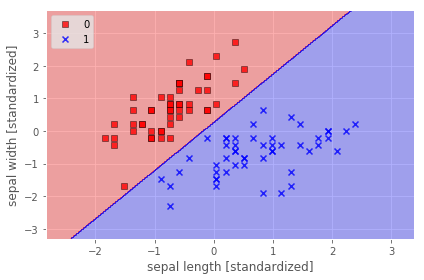

In [11]:
# 畫出⽬目前模型的決策邊界
plot_decision_regions(X_std, y, classifier=lr)
plt.xlabel('sepal length [standardized]')
plt.ylabel('sepal width [standardized]')
plt.legend(loc='upper left') #圖示
plt.tight_layout() #表示緊湊顯示圖像
#plt.savefig('images.png', dpi=300)
plt.show()

[經典演算法詳解–CART分類決策樹、迴歸樹和模型樹](https://codertw.com/%E7%A8%8B%E5%BC%8F%E8%AA%9E%E8%A8%80/564323/)